# **Introduction**

This notebook is a programming assignment wherein we have built a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

This notebook focusses to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features

In [1]:
#Let's import the required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset
df = pd.read_csv('/content/day.csv')

In [3]:
#Let's have a quick look at the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Let's see the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
#Verify whether dataset has any null value
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Shape of the dataset
df.shape

(730, 16)

In [7]:
#Let's see the summary of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Now, let's see the more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are few categorical variables in the dataset, for preprocessing the data we would need to create the dummy variables

def season_lab(season):
  if season == 1:
    lab = 'spring'
  elif season ==2:
    lab = 'summer'
  elif season ==3:
    lab = 'fall'
  elif season ==4:
    lab = 'winter'
  return lab

df['season'] = df['season'].apply(lambda x:season_lab(x))

In [9]:
def season_lab(season):
  return season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

df[['season']] = df[['season']].apply(season_lab)

In [10]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
def weather_lab(weather):
  return weather.map({1:'clear',2:'cloudy',3:'rainy'})

df[['weathersit']] = df[['weathersit']].apply(weather_lab)

In [13]:
def month_lab(month):
  return month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(month_lab)

In [14]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [15]:
def week_lab(week):
  return week.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df[['weekday']] = df[['weekday']].apply(week_lab)

In [16]:
#df_final = pd.concat([df, season_df,weathersit_df],axis=1)

In [17]:
#df_final = pd.concat([df,df2],axis=1)
#df_final.head()

In [18]:
#df_final.drop(labels=['weathersit','season','dteday','casual','registered','instant'],axis=1,inplace=True)

In [19]:
#df_final.head()

# Data Visualization

##Univariate Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [21]:
num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
num_cols = num_cols[4:]
print(len(num_cols))
num_cols

7


['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [22]:
def plots(num_cols):
  plt.figure(figsize=[25,25])
  for col in num_cols:
    a=num_cols.index(col)+1
    plt.subplot(3,3,a)
    sns.distplot(df[col])
  plt.show()

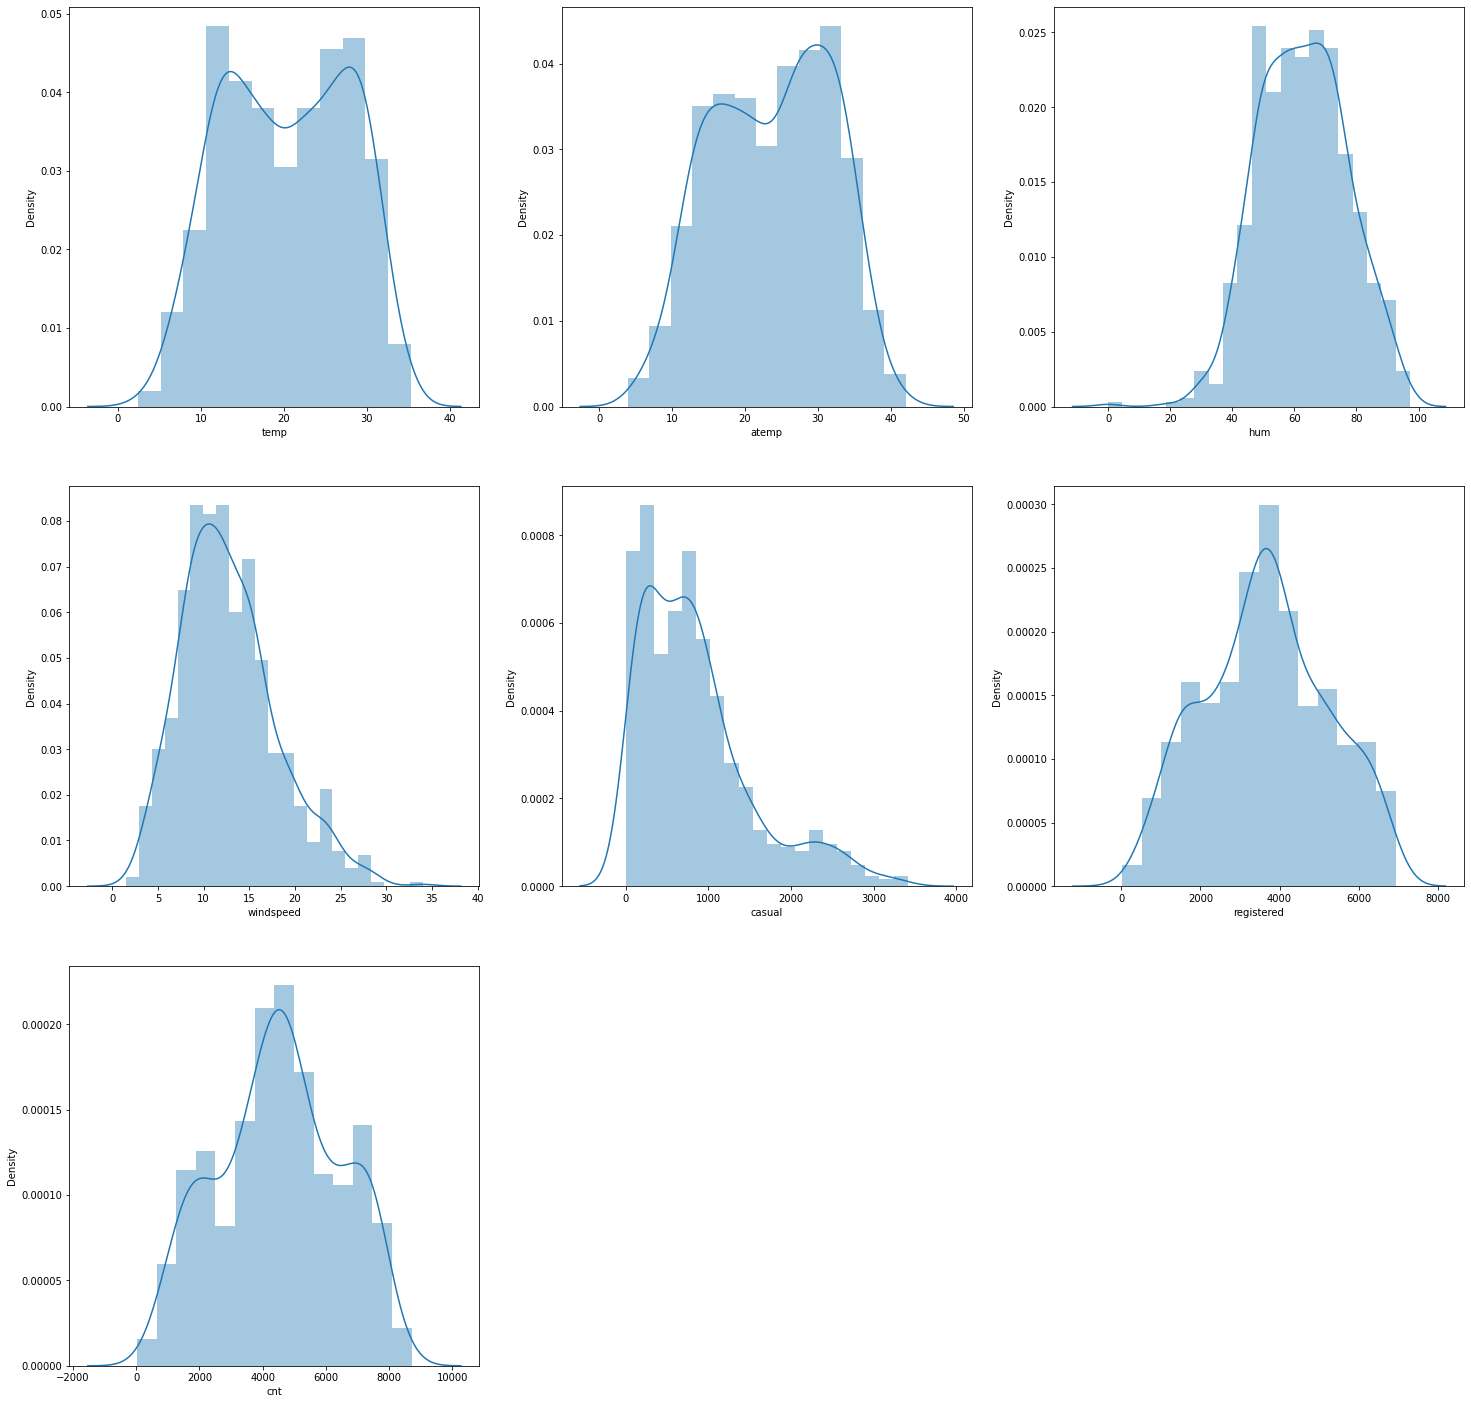

In [23]:
plots(num_cols)

## *Inferences:*
- windspeed normal dist
- causal users negatively skewed


## Bi-Variate Analysis

In [24]:
obj_cols = df.select_dtypes(['object']).columns.tolist()
obj_cols = obj_cols+['yr','holiday','workingday']
print(len(obj_cols))

8


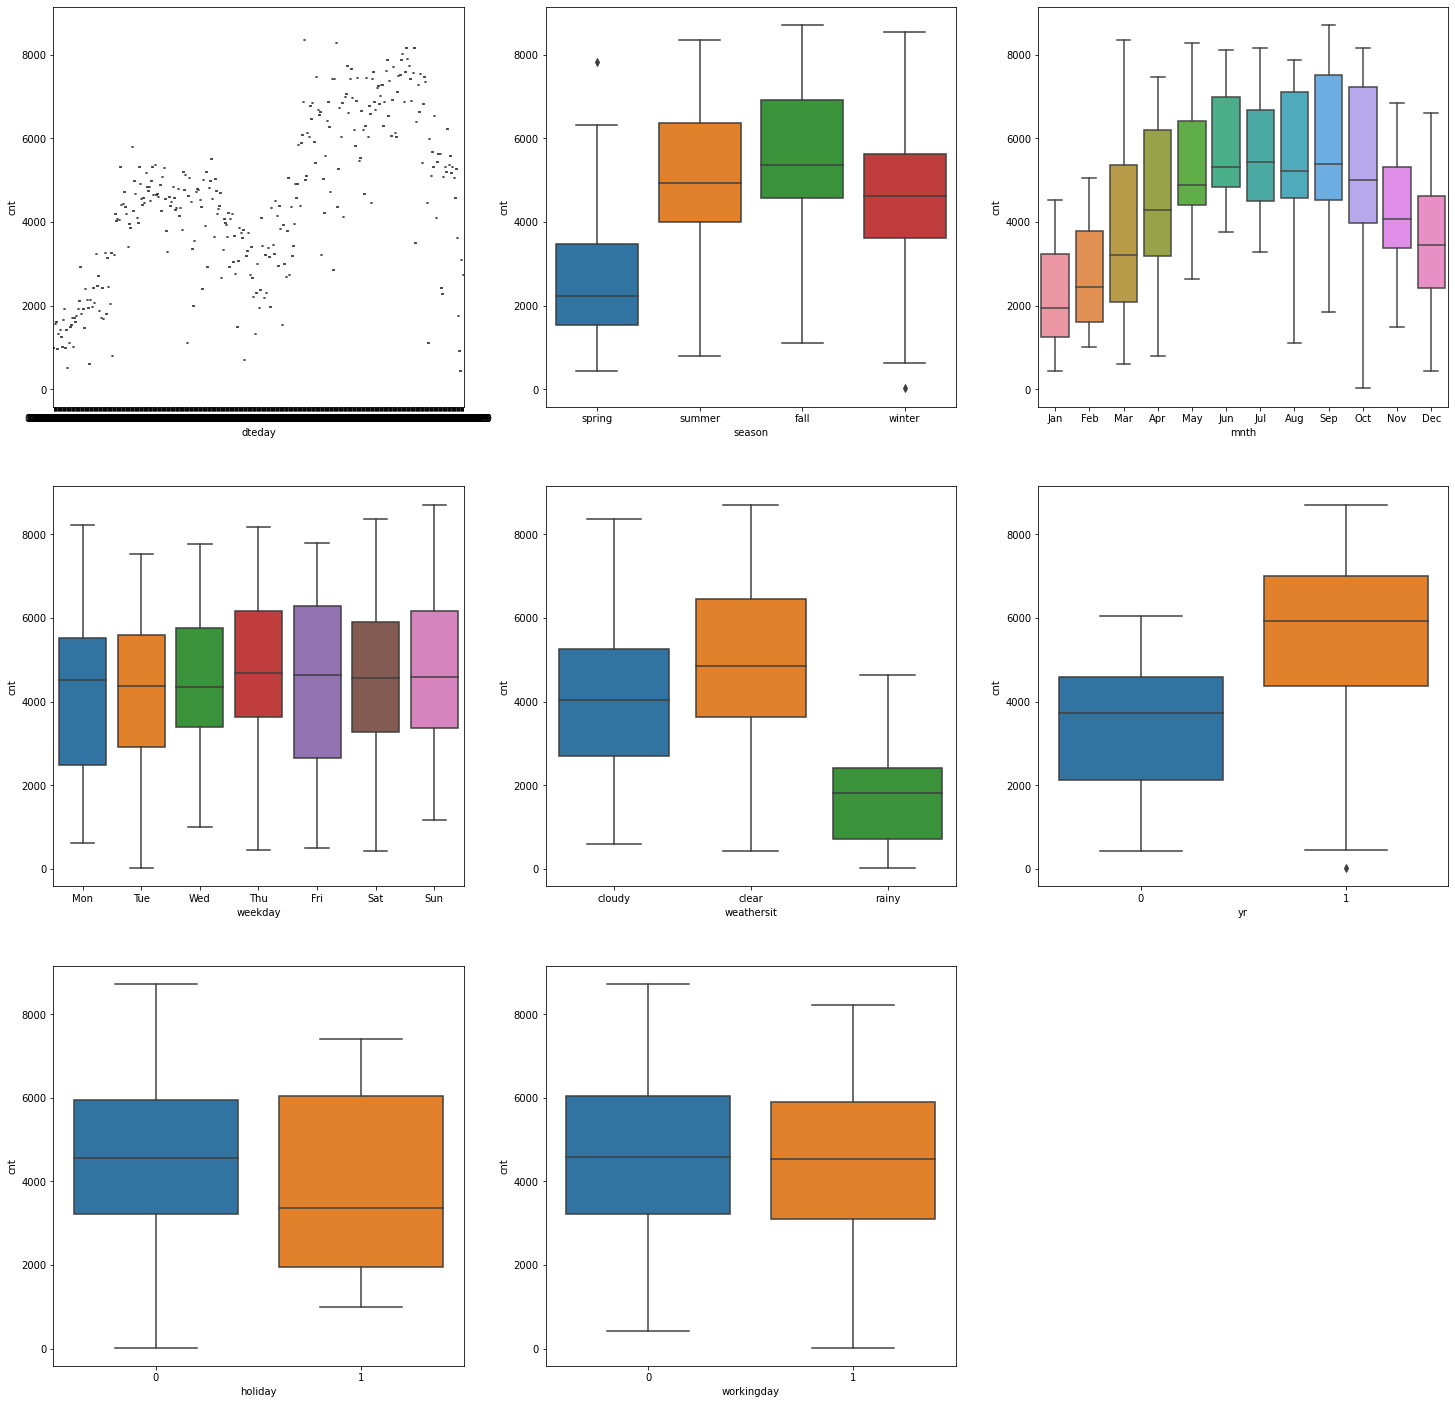

In [25]:
def plots(obj_cols):
  plt.figure(figsize=[25,25])
  for col in obj_cols:
    a=obj_cols.index(col)+1
    plt.subplot(3,3,a)
    sns.boxplot(x=df[col], y=df['cnt'])
  plt.show()

plots(obj_cols)

## *Inferences:*
- highest in fall lowest in spring
- increases in 2019 than 2018
- lowest in rainy weather

# Multivariate Analysis

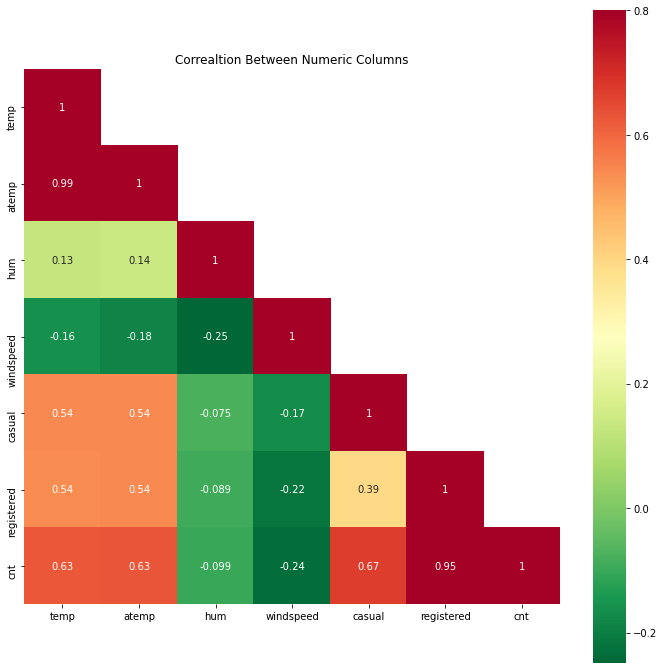

In [26]:
cols = df.select_dtypes(['int64','float64']).columns.tolist()
cols = cols[4:]

corr_mat = df[cols].corr()
corr_mat_mask = np.array(corr_mat)

corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

## *Inferences:*
- temp, atemp highly corr
- windspeed and hum neg. highly corr

# Creating dummy variables for categorical columns

Dropping columns 
- `weathersit`: This column has been converted to dummy variables
- `season` : This column has been converted to dummy variables
- `dteday`: Dropping this columns as dates data is not required in model building
- `casual`: We have total count of users hence dropping this column 
- `registered`: We have total count of users hence dropping this column 
- `instant` : This is  an index column and hence not required

In [27]:
df.drop(labels='dteday',axis=1,inplace=True)

In [28]:
df_catg = df.select_dtypes('object')
df_catg.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [29]:
df.drop(labels=['weathersit','mnth', 'weekday','season','casual','registered','instant'],axis=1,inplace=True)

In [30]:
df_dummy = pd.get_dummies(df_catg, drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df = pd.concat([df, df_dummy], axis=1)

Dropping columns 
- `atemp`: This column is highly correlated with `temp` temperature
- `windspped` :  This column is highly correlated with `hum` humidity


In [32]:
df.drop(labels=['atemp','hum'],axis=1,inplace=True)

In [33]:
df.head()

,yr,holiday,workingday,temp,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
0,0,0,1,14.110847,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
X = df.drop('cnt',axis=1)
y = df['cnt']

In [35]:
print('Features shape: {}, and Target Variable {}'.format(X.shape,y.shape[0]))

Features shape: (730, 27), and Target Variable 730


In [36]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print('Features : \nTrain set shape {} \nTest set shape{}'.format(X_train.shape,X_test.shape), end='\n\n')
print('Target : \nTrain set shape {} \nTest set shape {}'.format(y_train.shape[0],y_test.shape[0]))

Features : 
Train set shape (584, 27) 
Test set shape(146, 27)

Target : 
Train set shape 584 
Test set shape 146


In [38]:
num_feat = list(X_train.describe().columns)
num_feat

['yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'weathersit_cloudy',
 'weathersit_rainy']

In [39]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [40]:
X_train.head()

,yr,holiday,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
239,-0.989778,-0.167836,0.664812,1.169798,1.494191,-0.558891,-0.593171,-0.577350,3.268027,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,-0.710742,-0.156721
97,-0.989778,-0.167836,-1.504184,-0.849259,0.480773,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,1.406980,-0.156721
503,1.010327,-0.167836,-1.504184,0.587516,-1.385350,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,3.16526,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-0.710742,-0.156721
642,1.010327,-0.167836,-1.504184,0.669099,-1.093395,-0.558891,-0.593171,1.732051,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,3.16526,-0.274784,-0.404162,2.456857,-0.407024,-0.424026,-0.409878,-0.395519,-0.710742,-0.156721
498,1.010327,-0.167836,0.664812,0.442477,0.294182,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,3.16526,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,1.406980,-0.156721


In [41]:
#Now creating a linear model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
yr,993.488771
holiday,-163.689280
workingday,-317.153923
temp,751.261210
windspeed,-184.880510
season_spring,-346.951468
season_summer,3.256137
season_winter,270.145695
mnth_Aug,-30.297095
mnth_Dec,-178.355726


In [43]:
print('Intercept of the linear model: {}'.format(reg.intercept_))

Intercept of the linear model: 4492.518835616438


In [50]:
#Now , let's make predications using the linear model
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [46]:
df_result = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df_result.head()

,Actual,Predicted
196,5923,4116.650375
187,4592,4851.314087
14,1248,725.992281
31,1360,1284.328600
390,4075,3717.072329


In [51]:
#Let's check the R2
from sklearn.metrics import r2_score
print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

On Train: 0.8297106634103009
On Test: 0.8728071946059206


In [ ]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train, y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
# RFE: Recursive Feature Elimination

from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(reg, 25)
rfe = rfe.fit(X_train, y_train)
ref_df = pd.DataFrame(data={'Column':X_train.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

In [ ]:
ref_df[ref_df.RFE == False]['Column'].to_list()


                        coef    std err          t      P>|t|      [0.

---

025      0.975]

season_summer        | 3.2561 |    93.341 |     0.035    |  0.972 | -180.087   |  186.600

mnth_Mar              2.7215     59.976      0.045      0.964    -115.086     120.529

From P value and RFE `season_summer`, `mnth_Mar` are insignificant hence dropping


## Model 2

In [ ]:
X_train_2 = X_train.drop(labels=['season_summer','mnth_Mar'],axis=1)
X_test_2 = X_test.drop(labels=['season_summer','mnth_Mar'],axis=1)
reg2 = LinearRegression()
reg2.fit(X_train_2, y_train)
y_pred = reg2.predict(X_test_2)
r2_score(y_test, y_pred)

In [ ]:
X_train_new = build_model(X_train_2, y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train_2, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_2.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

## Model 3
From P values and RFE we can drop `weekday_Thu`, `mnth_Oct`, `mnth_Jun` 

In [ ]:
X_train_3 = X_train_2.drop(labels=['weekday_Thu','mnth_Oct','mnth_Jun'],axis=1)
X_test_3 = X_test_2.drop(labels=['weekday_Thu','mnth_Oct','mnth_Jun'],axis=1)
reg3 = LinearRegression()
reg3.fit(X_train_3, y_train)
y_pred = reg3.predict(X_test_3)
r2_score(y_test, y_pred)

In [ ]:
X_train_new = build_model(X_train_3, y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train_3, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_3.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

# Model 4

Working day has very high VIF, dropping it out

In [ ]:
X_train_4 = X_train_3.drop(labels=['workingday'],axis=1)
X_test_4 = X_test_3.drop(labels=['workingday'],axis=1)
reg4 = LinearRegression()
reg4.fit(X_train_4, y_train)
y_pred = reg4.predict(X_test_4)
print(r2_score(y_test, y_pred),end='\n')

X_train_new = build_model(X_train_4, y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
rfe = RFE(reg, 18)
rfe = rfe.fit(X_train_4, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_4.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

## Model 5

From P values and RFE we can drop `mnth_Aug`, `weekday_Sat`

In [ ]:
X_train_5 = X_train_4.drop(labels=['mnth_Aug','weekday_Sat'],axis=1)
X_test_5 = X_test_4.drop(labels=['mnth_Aug','weekday_Sat'],axis=1)
reg5 = LinearRegression()
reg5.fit(X_train_5, y_train)
y_pred = reg5.predict(X_test_5)
print(r2_score(y_test, y_pred),end='\n')

X_train_new = build_model(X_train_5, y_train)

In [ ]:
rfe = RFE(reg, 18)
rfe = rfe.fit(X_train_5, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_5.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

In [ ]:
checkVIF(X_train_new)